In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = 'winequality-red.csv'
data = pd.read_csv(path, delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


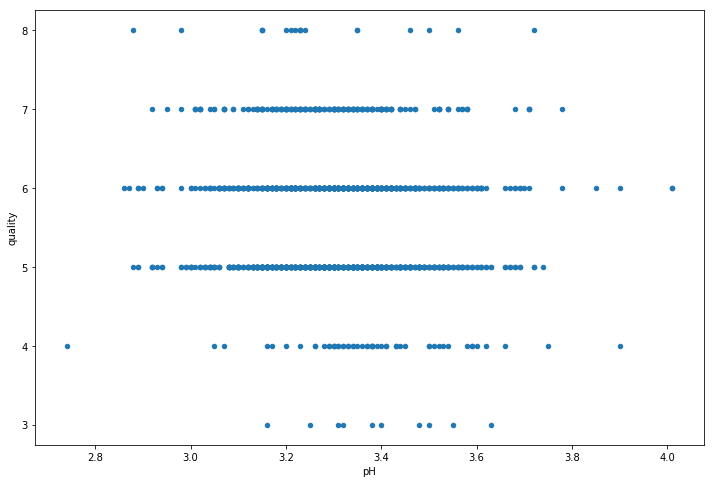

In [14]:
data.plot(kind='scatter',x='pH',y='quality',figsize=(12,8))
plt.show()

In [15]:
def computerCost(X,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [16]:
data.insert(0, 'Ones', 1)

In [17]:
cols = data.shape[1]###########第一维的长度
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#y是最后一列

In [18]:
X.head()

,Ones,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [20]:
X=np.matrix(X.values)
y=np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [21]:
theta

matrix([[0, 0]])

In [22]:
X.shape,theta.shape,y.shape

((1599, 12), (1, 2), (1599, 1))

In [23]:
computerCost(X,y,theta)

ValueError: shapes (1599,12) and (2,1) not aligned: 12 (dim 1) != 2 (dim 0)

In [ ]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    pa = int(theta.ravel().shape[1])#ravel是将多维数组变为一维数组
    cost = np.zeros(iters)
    
    for i in range(iters):
        cost1 = (X*theta.T) -y
        
        for j in range(pa):
            term = np.multiply(cost1,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta =temp 
        cost[i] = computerCost(X,y,theta)
    return theta,cost,pa

In [ ]:
alpha = 0.01
iters = 1050

In [ ]:
g ,cost,pa= gradientDescent(X,y,theta,alpha,iters)
print(pa)

In [ ]:
computerCost(X,y,g)

In [ ]:
#x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0] +(g[0,1]*x)
fig,ax = plt.subplots(figsize=(12,8))
###plt.subplots是画图的，灵活
ax.plot(x,f,'r',label='Prediction')#‘r’表示red
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)#1表示在右边，2表示在左边
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('LYP prediction Profit')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()